In [1]:
import time
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.optimize import curve_fit

def fib_recursion(n):
    n_fibonacci = 0
    if n == 0:
        return n_fibonacci
    if n == 1:
        n_fibonacci+=1
        return n_fibonacci
    else:
        n_fibonacci=fib_recursion(n-1)+fib_recursion(n-2)
        return n_fibonacci

In [3]:
def plotRecursivo(n):
    times = []
    iteration = []
    for i in range(n):
        iteration.append(i+1)
        init=time.time()
        fib_recursion(i+1)
        difference_time=time.time()-init
        times.append(difference_time)
    return iteration, times

In [4]:
def fib(n):
    a=1
    b=0
    for i in range(n):
        a, b = b, a+b
    return b

In [5]:
def plotIterativo(n):
    times = []
    iteration = []
    for i in range(n):
        iteration.append(i+1)
        init=time.time()
        fib(i+1)
        difference_time=time.time()-init
        times.append(difference_time)
    return iteration, times

In [6]:
def linear(x, a, b):
    return a*x+b
def polynomial(x, a, b, c, d, e, f, g):
    return a*x**6+b*x**5+c*x**4+d*x**3+e*x**2+f*x+g
def exponential(x, a, b, c):
    return np.exp(a * x)*b+c

In [7]:
x, y = plotRecursivo(35)
x1, y1 = plotIterativo(60)

Standard deviation lineal fit:  [0.04653286 0.9604274 ]
Standard deviation polynomial fit:  [1.32887853e-07 1.43978475e-05 5.99880606e-04 1.20324226e-02
 1.18556061e-01 5.16653405e-01 7.25114545e-01]
Standard deviation exponential fit:  [1.31812697e-02 7.95723577e-08 4.39101816e-02]


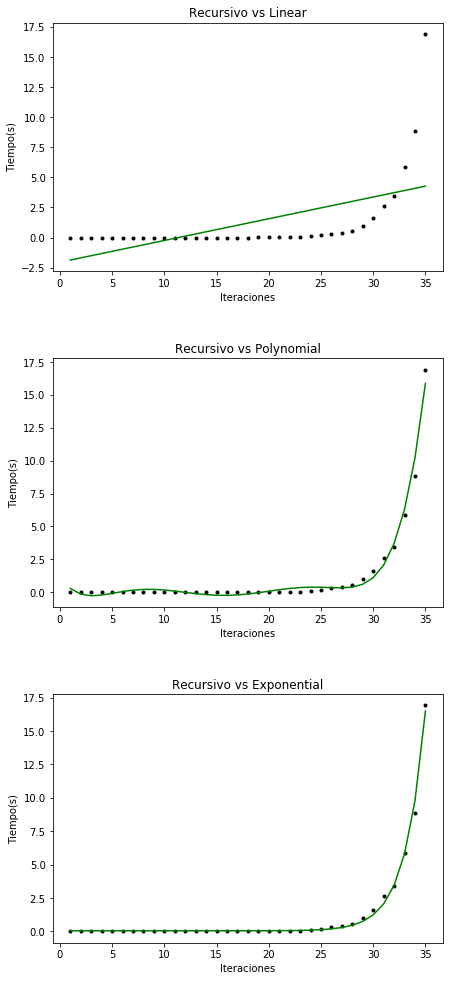

In [13]:
popt,pcov=curve_fit(linear,x,y)
plt.figure(figsize=(7,9))
plt.subplot(311)
plt.plot(x,y,'.', c='black')
plt.plot(x,linear(np.array(x),*popt), c='g')
plt.title("Recursivo vs Linear")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo(s)")
print('Standard deviation lineal fit: ', np.sqrt(pcov.diagonal()))

popt1,pcov1=curve_fit(polynomial,x,y)
plt.subplot(312)
plt.plot(x,y,'.', c='black')
plt.plot(x,polynomial(np.array(x),*popt1), c='g')
plt.title("Recursivo vs Polynomial")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo(s)")
print('Standard deviation polynomial fit: ', np.sqrt(pcov1.diagonal()))

popt2,pcov2=curve_fit(exponential,x,y)
plt.subplot(313)
plt.plot(x,y,'.', c='black')
plt.plot(x,exponential(np.array(x),*popt2), c='g')
plt.title("Recursivo vs Exponential")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo(s)")
print('Standard deviation exponential fit: ', np.sqrt(pcov2.diagonal()))
plt.subplots_adjust(top=1.5, bottom=0.08, hspace=0.35)
plt.show()

En el caso del método recursivo el error más alto se tiene con el ajuste linear, luego el polinomial y por ultimo el error más bajo con el ajuste exponencial, por lo cual esta función es el mejor ajuste para dicho método.

Standard deviation lineal fit:  [0. 0.]
Standard deviation polynomial fit:  [0. 0. 0. 0. 0. 0. 0.]
Standard deviation exponential fit:  [6.75108200e-08 5.64515622e-13 5.25219534e+10]


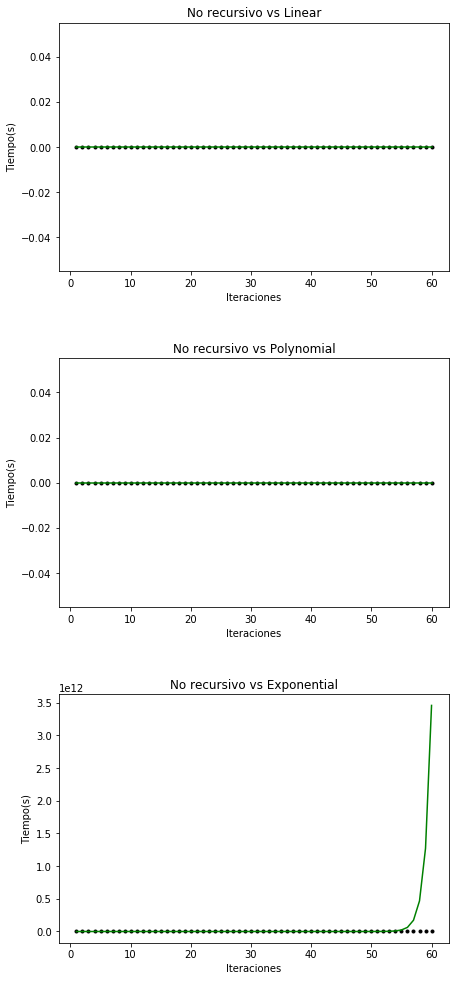

In [14]:
popt3,pcov3=curve_fit(linear,x1,y1)
plt.figure(figsize=(7,9))
plt.subplot(311)
plt.plot(x1,y1,'.', c='black')
plt.plot(x1,linear(np.array(x1),*popt3), c='g')
plt.title("No recursivo vs Linear")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo(s)")
print('Standard deviation lineal fit: ', np.sqrt(pcov3.diagonal()))

popt4,pcov4=curve_fit(polynomial,x1,y1)
plt.subplot(312)
plt.plot(x1,y1,'.', c='black')
plt.plot(x1,polynomial(np.array(x1),*popt4), c='g')
plt.title("No recursivo vs Polynomial")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo(s)")
print('Standard deviation polynomial fit: ', np.sqrt(pcov4.diagonal()))

popt5,pcov5=curve_fit(exponential,x1,y1)
plt.subplot(313)
plt.plot(x1,y1,'.', c='black')
plt.plot(x1,exponential(np.array(x1),*popt5), c='g')
plt.title("No recursivo vs Exponential")
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo(s)")
print('Standard deviation exponential fit: ', np.sqrt(pcov5.diagonal()))
plt.subplots_adjust(top=1.5, bottom=0.08, hspace=0.35)
plt.show()

En mi caso el gráfico del método no recursivo contra el tiempo es y=0, por lo cual para los ajustes linear y polinomial es igual a 0, mientras que el error es más alto para el ajuste exponencial.

In [15]:
def R2(y, y1):
    y2 = y1-y
    r2 = 1-(np.var(y2)/np.var(y))
    return r2

In [16]:
a = R2(y, linear(np.array(x),*popt))
print('R2 con Fib recursivo y fit lineal: ', '%.4f'%a)

a = R2(y, polynomial(np.array(x),*popt1))
print('R2 con Fib recursivo y fit polinomial: ', '%.4f'%a)

a = R2(y, exponential(np.array(x),*popt2))
print('R2 con Fib recursivo y fit exponencial: ', '%.4f'%a)

R2 con Fib recursivo y fit lineal:  0.3132
R2 con Fib recursivo y fit polinomial:  0.9868
R2 con Fib recursivo y fit exponencial:  0.9955


El $R^2$ más cercano a 1 fue con el ajuste exponencial, por lo cual se confirma que es el mejor ajuste para el método recursivo. Por otro lado como el gráfico del método no recursivo contra el tiempo es y=0 la varianza del tiempo de este método es 0 y por lo tanto no se puede hallar $R^2$.

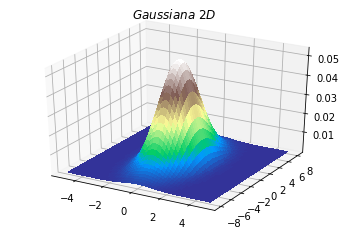

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def Gausian_2D(t,mu_x=0,mu_y=0,sigma_x=1,sigma_y=3):
    return 1.0/(2*np.pi*sigma_x*sigma_y)*np.exp(-0.5*((t[0]-mu_x)**2/sigma_x**2)- 0.5*((t[1]-mu_y)**2/sigma_y**2))

x=np.linspace(-5,5,1000)
y=np.linspace(-8,8,1000)
X,Y=np.meshgrid(x,y)
t = (X,Y)
z=Gausian_2D(t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, z, cmap=cm.terrain, linewidth=0, antialiased=False)
plt.title('$Gaussiana$ $2D$')
plt.show()

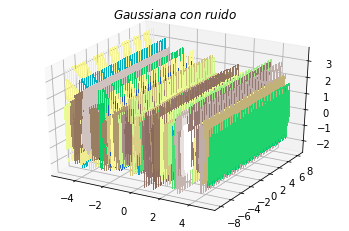

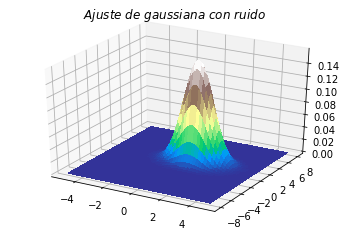

In [37]:
def Gausian_Ruido(t,mu_x=0,mu_y=0,sigma_x=1,sigma_y=3):
    
    z = 1.0/(2*np.pi*sigma_x*sigma_y)*np.exp(-0.5*((t[0]-mu_x)**2/sigma_x**2)- 0.5*((t[1]-mu_y)**2/sigma_y**2))
    ruido = np.random.normal(0,1,1000)
    z += ruido
    return z

z1=Gausian_Ruido(t)
z2 = z1.flatten()
t1 = np.asarray(t).flatten()

fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.plot_surface(X, Y, z1, cmap=cm.terrain, linewidth=0, antialiased=False)
plt.title('$Gaussiana$ $con$ $ruido$')
plt.show()

fig3 = plt.figure()
popt6,pcov6=curve_fit(Gausian_2D,t1,z2)
ax2 = fig3.gca(projection='3d')
ax2.plot_surface(X, Y, Gausian_2D(t,*popt6), cmap=cm.terrain, linewidth=0, antialiased=False)
plt.title('$Ajuste$ $de$ $gaussiana$ $con$ $ruido$')
plt.show()


Luego del ajuste se observa una gaussiana, sin embargo esta parece estar trasladada hacia la derecha en el eje x además de tener como valor maximo en z 0.14 en vez de 0.05. También se observa que el eje más extendido es el x en vez del y.

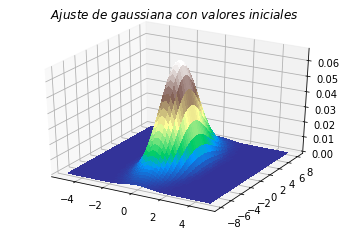

In [42]:
fig4 = plt.figure()
valoresIniciales = [0,0,0.8]
popt7,pcov7=curve_fit(Gausian_2D,t1,z2,p0=valoresIniciales)
ax3 = fig4.gca(projection='3d')
ax3.plot_surface(X, Y, Gausian_2D(t,*popt7), cmap=cm.terrain, linewidth=0, antialiased=False)
plt.title('$Ajuste$ $de$ $gaussiana$ $con$ $valores$ $iniciales$')
plt.show()

Por último al ponerle valores iniciales al curve_fit, se logró que los parametros del ajuste se acercaran mucho mas a los de la Gausiana inicial.